In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft
from IPython.display import Audio

In [2]:
FRAME_SIZE = 256
SKIP = 128

In [6]:
Fs, data = read('test_audio.wav')
numFrames = int(len(data) / SKIP)
output = np.zeros(len(data))
window_num = 0
noise_spectrum = np.zeros(FRAME_SIZE)
frame = np.zeros(FRAME_SIZE)

residual = np.zeros(FRAME_SIZE)

previous = np.zeros(FRAME_SIZE)
current = np.zeros(FRAME_SIZE)
future = np.zeros(FRAME_SIZE)

c_flag = 0

ns_s = np.zeros(numFrames)

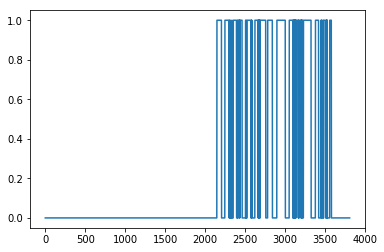

In [17]:
for i in range(numFrames):
    #print(i)
    #print(previous)
    frame = data[i * SKIP : (i * SKIP + FRAME_SIZE)]
    
    if(len(frame) < FRAME_SIZE):
        continue
    #Judging non-speech and speech activity
    energy = np.zeros(frame.shape[0])
    for j in range(frame.shape[0]):
        energy[j] = pow(frame[j], 2)
        
    if (sum(energy) < 990000000):
        f_flag = 0
        ns_s[i] = 0
    else:
        f_flag = 1
        ns_s[i] = 1
        
plt.plot(ns_s)